In [9]:
import torch



import sys
if '..' not in sys.path:
    sys.path.insert(0, '..')

from datasets.import_dataset import import_dataset
from trainer import Trainer
from utils.plotting import *

%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


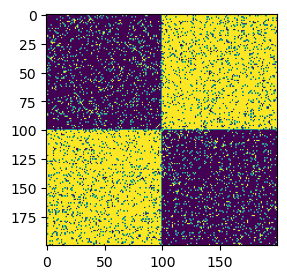

In [49]:
data_bipart = import_dataset('bipartite')
plot_sparse_adj(edge_index=data_bipart.edge_index)



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:301:::  
 starting optimization of bigclam on bipartite on device cpu

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 2,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 1e-05,
        "n_iter": 7000,
        "early_stop": 0
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:409:::  


FINISHED train model on params 
 last accuracies:
losses: -13743.3359375


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:415:::  





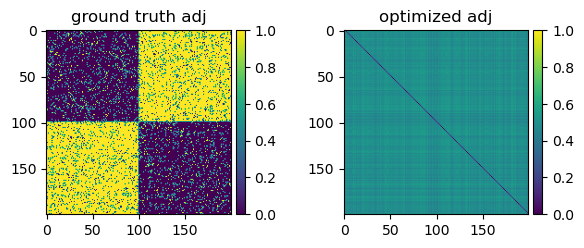

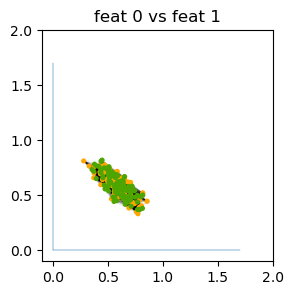

In [66]:

config_triplets=[
# ['feat_opt', 'lr', 0.001],
# ['clamiter_init', 'l1_reg', 0.05],
# ['feat_opt', 'n_iter', 50000]

]

trainer_bigclam_bipart = Trainer(dataset=data_bipart, 
                                 model_name='bigclam',
                                 device='cpu',
                                 config_triplets_to_change=config_triplets,
                                 mighty_configs_dict=False
                                )

_ = trainer_bigclam_bipart.train(plot_every=100000)

trainer_bigclam_bipart.plot_state(things_to_plot=['adj', '2dgraphs'], node_size_factor=1)




/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:301:::  
 starting optimization of iegam on bipartite on device cpu

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 2,
        "dim_attr": 64,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 1e-05,
        "n_iter": 7000,
        "early_stop": 0
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:409:::  


FINISHED train model on params 
 last accuracies:
losses: -6509.19970703125


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:415:::  





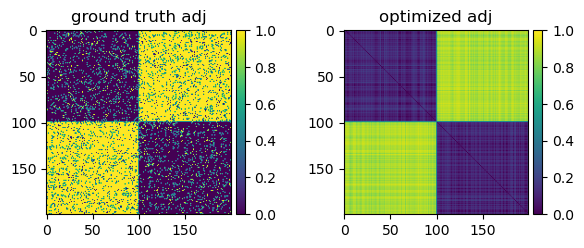

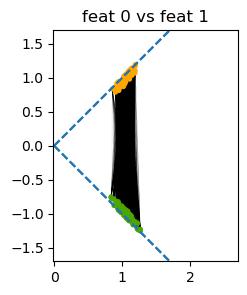

In [52]:

config_triplets=[
# ['clamiter_init', 'dim_feat', 2],

]

trainer_iegam_bipart = Trainer(dataset=data_bipart, 
                                 model_name='iegam',
                                 device='cpu',
                                 config_triplets_to_change=config_triplets,
                                 mighty_configs_dict=False
                                )

_ = trainer_iegam_bipart.train(plot_every=100000)
trainer_iegam_bipart.plot_state(things_to_plot=['adj', '2dgraphs'])